In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv('billets.csv',sep=";")
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
data.shape

(1500, 7)

In [ ]:
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


faire linputation de margin_low


In [ ]:
X = data.drop("is_genuine",axis=1)
y = data["is_genuine"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
382,172.28,104.62,103.80,4.08,3.08,113.26
538,171.90,104.50,103.49,4.08,2.82,113.50
1493,171.63,104.33,104.61,4.88,3.35,112.16
1112,172.06,104.28,104.31,5.61,3.27,111.61
324,172.10,104.42,103.60,4.18,2.89,113.32


In [ ]:
y_train.shape

(1200,)

In [ ]:
margin_low_mean = x_train["margin_low"].mean()
margin_low_mean_test = x_test["margin_low"].mean()

x_train["margin_low"] = x_train["margin_low"].fillna(margin_low_mean)
x_test = x_test.fillna(margin_low_mean_test)
x_train.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,171.957067,104.030342,103.919958,4.473499,3.150933,112.690067
std,0.307434,0.301215,0.326365,0.654196,0.231815,0.879176
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.490000
25%,171.750000,103.820000,103.707500,4.010000,2.990000,112.057500
50%,171.960000,104.040000,103.920000,4.320000,3.130000,112.980000
75%,172.170000,104.230000,104.150000,4.792500,3.310000,113.350000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
score = model.score(x_train,y_train)
print(score)

0.9908333333333333


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred


array([False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True, False, False,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False,  True,

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 0.1
R2 Score: 0.9569377990430622


In [ ]:
from sklearn.metrics import  confusion_matrix,recall_score,precision_score,f1_score
print(confusion_matrix(y_test, y_pred))
print( recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print( f1_score(y_test, y_pred))


[[107   3]
 [  0 190]]
1.0
0.9844559585492227
0.9921671018276762


In [ ]:
y_proba = model.predict_proba(x_test)

In [ ]:
seuil = 0.7
y_custom = (y_proba[:,1] > seuil).astype(int)

In [ ]:
y_custom.shape

(300,)

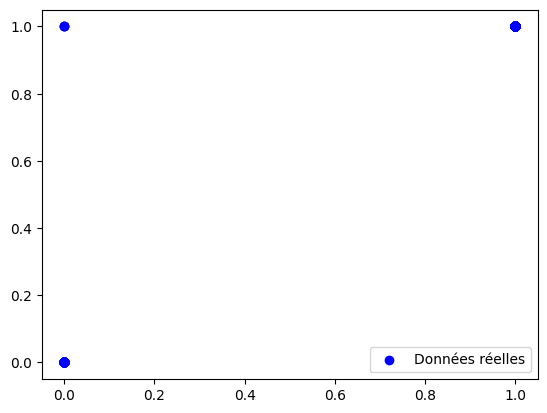

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='Données réelles')
plt.legend()

using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [ ]:
y_proba = knn.predict_proba(x_test)


In [ ]:
y_score = knn.score(x_test, y_test)
y_score

0.9866666666666667

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True, False, False,  True,
        True,  True, False, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False,  True,

In [ ]:
from sklearn.metrics import  confusion_matrix,recall_score,precision_score,f1_score


print("confusion matrix :",confusion_matrix(y_test, y_pred))


print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

confusion matrix : [[106   4]
 [  0 190]]
Recall: 1.0
Precision: 0.979381443298969
F1 Score: 0.9895833333333334


BagingClassifier

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score


iris = load_iris()
X, y = iris.data, iris.target
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = DecisionTreeClassifier()


bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)
y_pred




array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_pred


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

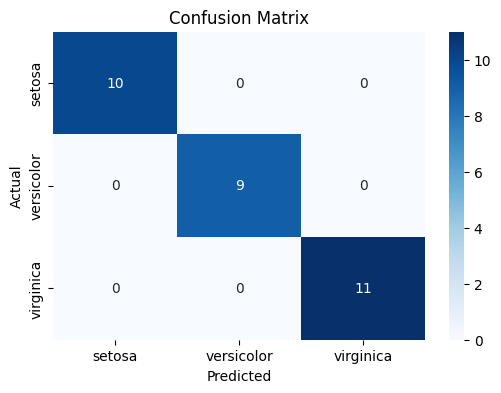

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [8]:
y_proba = bagging_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 1.0


In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle Bagging : {accuracy:.2f}")

Précision du modèle Bagging : 1.00


using boosting

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = DecisionTreeClassifier(max_depth=1)

adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9333
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


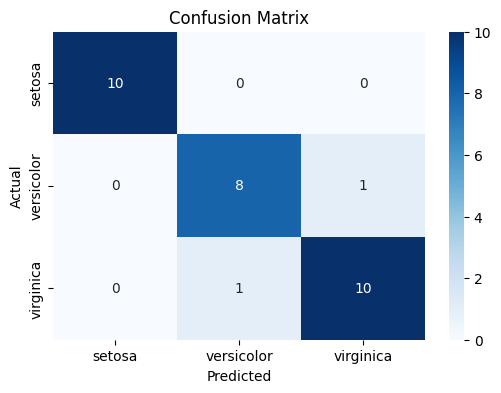

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

using stacking

In [26]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = [('lr',LogisticRegression()),('rf',RandomForestClassifier()),('kn',KNeighborsClassifier())]
StackingClassifier = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())
StackingClassifier.fit(X_train, y_train)

y_pred = StackingClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


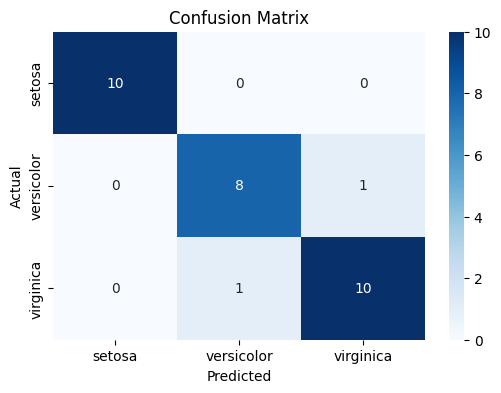

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()